### Comparison of Marital Status and Test Scores

In [2]:
# import modules
from pathlib import Path
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd

In [3]:
#Create the Path and a DataFrame
csvpath = Path("../Data/CleanedSchoolData.csv")
Data = pd.read_csv(csvpath)
Data.head()

,Gender,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,Average Score
0,female,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74,72.0
1,female,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,69,90,88,82.0
2,female,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91,90.0
3,male,associate's degree,free/reduced,none,married,never,no,1.0,school_bus,5 - 10,45,56,42,48.0
4,male,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75,76.0


## Box Plot of Parent Marital Status and Mean Test Scores


In [4]:
#Describe Data
DataDescribe = Data.groupby("ParentMaritalStatus")["Average Score"].describe()
Types = DataDescribe.index
Count = DataDescribe["count"]


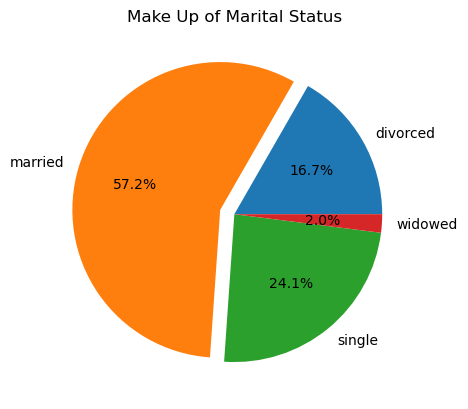

In [5]:
fig, ax = plt.subplots()
explode = (0,.1,0,0)
ax.pie(DataDescribe["count"], labels=Types, autopct="%1.1f%%", explode=explode);
plt.title("Make Up of Marital Status");

In [6]:
#Describe Data
DataDescribe

,count,mean,std,min,25%,50%,75%,max
ParentMaritalStatus,,,,,,,,
divorced,4919.0,68.380972,14.521569,10.0,58.0,68.0,79.0,100.0
married,16844.0,68.155248,14.431619,16.0,58.0,68.0,79.0,100.0
single,7097.0,67.830210,14.428704,9.0,58.0,68.0,78.0,100.0
widowed,591.0,68.526227,14.394758,20.0,58.0,68.0,80.0,99.0


In [7]:
divorcedmedian = Data.loc[Data["ParentMaritalStatus"] == "divorced"]["Average Score"].median()
marriedmedian = Data.loc[Data["ParentMaritalStatus"] == "married"]["Average Score"].median()
singlemedian = Data.loc[Data["ParentMaritalStatus"] == "single"]["Average Score"].median()
widowedmedian = Data.loc[Data["ParentMaritalStatus"] == "widowed"]["Average Score"].median()
print(f' Divorced median is {divorcedmedian}')
print(f' Married median is {marriedmedian}')
print(f' Single median is {singlemedian}')
print(f' Widowed median is {widowedmedian}')


 Divorced median is 68.0
 Married median is 68.0
 Single median is 68.0
 Widowed median is 68.0


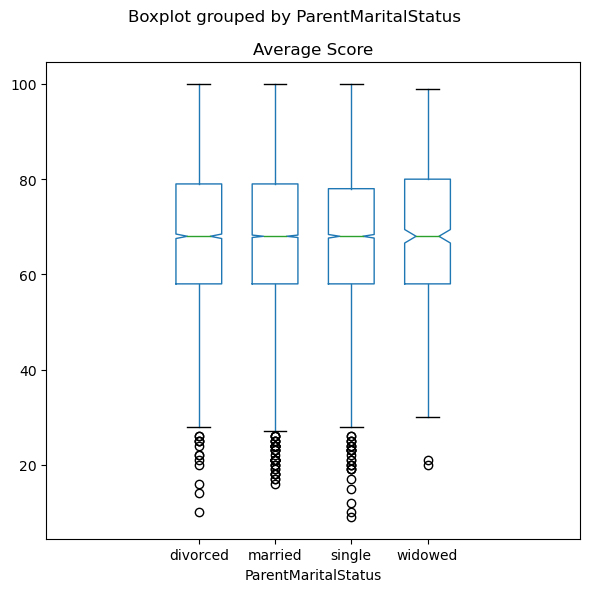

In [8]:
# Box plot of different marital status scores
Data.boxplot("Average Score", by="ParentMaritalStatus", figsize=(6, 6),grid=False, notch=True, widths=(.15,.15,.15,.15), positions=[.25,.5,.75,1])
plt.tight_layout();
#plt.savefig("Box and Whisker Parent Marital Status")

In [9]:
#Test statistical Significance of the groups
divorced = Data.loc[Data["ParentMaritalStatus"] == "divorced"]["Average Score"]
married = Data.loc[Data["ParentMaritalStatus"] == "married"]["Average Score"]
single = Data.loc[Data["ParentMaritalStatus"] == "single"]["Average Score"]
widowed = Data.loc[Data["ParentMaritalStatus"] == "widowed"]["Average Score"]
stats.f_oneway(divorced, married, single, widowed)

F_onewayResult(statistic=1.6762705167648146, pvalue=0.16972443726584271)

## Insights:


Notes: Most of the data is made up of students with Married Parents. Our group wasn't entirely sure about what the difference between divorced and single parents were, but those two categories made up the next largest group of data. The widowed parents make up a smaller portion of the group which makes sense because you wouldn't expect most kids to have a widowed parent. There is a lot left to be described by the data here. A study done by childstats.gov, details that 65% of children, have married parents but that makeup includes children that have only one biological parent, married adoptive parents, and  

After taking a look at the distribution of parent statuses, I described the data to get a better feel for the distribution of the test scores by parent marital status. Between all groups, the results were basically the same. All means were within .7% of one another and the IQR were nearly the same. The box and whisker plots explain this visually as well. Furthermore, an ANOVA test was conducted to determine if any one group was statistically significant from the other. The resulting P-Value from the test was .169. After gathering that statistic, I concluded that based on the way the data was laid out,there was no noticable impact on parent marital status and test scores. 

## Distributions

Notes: Standard distribution below indicates that the data is not random. Data looks like how student scores would be distributed.

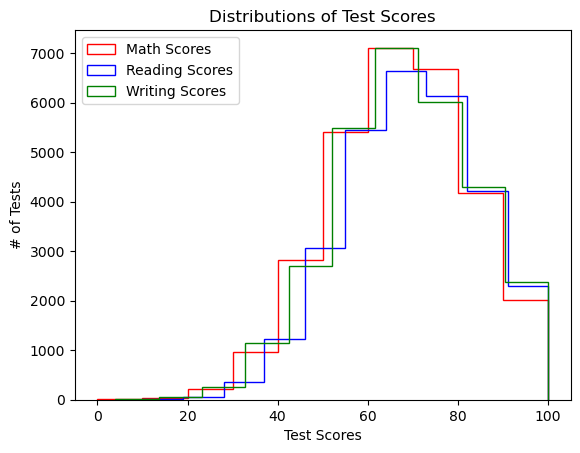

In [11]:
fig, ax0 = plt.subplots()
plt.title("Distributions of Test Scores")
plt.ylabel("# of Tests")
plt.xlabel("Test Scores")
plt.hist(x=Data["MathScore"],color="Red",histtype="step",fill=False)
plt.hist(x=Data["ReadingScore"],color="Blue",histtype="step",fill=False)
plt.hist(x=Data["WritingScore"],color="Green",histtype="step",fill=False)
plt.legend(["Math Scores", "Reading Scores", "Writing Scores"]);
#plt.savefig("Standard Distribution of Test Scores")